# K-means Clustering and Principal Component Analysis

## 2 Principal Component Analysis

### 2.1 Example Dataset

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = scipy.io.loadmat('data/ex7data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data['X']
X.shape

(50, 2)

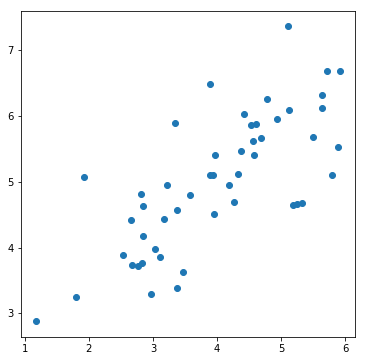

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

We can see that our data is much more varied in one direction than the other. We're going to use PCA to reduce the data from 2D to 1D.

### 2.2 Implementing PCA

In [5]:
def feature_normalise(X):
    '''
    Returns a normalized version of X where the mean value
    of each feature (column) is 0 and the standard deviation is 1.
    '''
    
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm / sigma
    
    return X_norm, mu, sigma

In [6]:
# Normalise X
X_norm, mu, sigma = feature_normalise(X)

In [7]:
def pca(X):
    '''
    Computes eigenvectors of the covariance matrix of X.
    Returns the eigenvectors U, and eigenvalues S.
    '''
    
    m, n = X.shape
    
    # Compute covariance matrix
    Sigma = 1/m * np.dot(X.T, X)
    
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S

In [8]:
U, S = pca(X_norm)

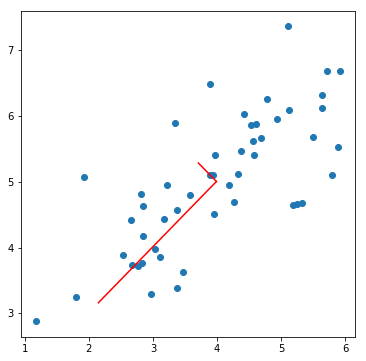

In [9]:
# Draw eigenvectors centred at mean of data
# These show the directions of maximum variations in the dataset.

# My 'mu' and 'U' arrays are of the form (x, y), but matplotlib
# wants plt.plot(x, y), so we have to rearrnage things a bit:

eigen_vect1 = np.vstack([mu, mu + 1.5 * S[0] * U[:,0].T])

# eigen_vect1 is of the form
#
# array([[x1, y1]
#       [x2, y2]])
#
# where [x1, y1] is the mean and
# [x2, y2] is mean plus 1.5 * eigenvalue * eigenvector
# 1.5 scaling is just to make lines more visible on plot

eigen_vect2 = np.vstack([mu, mu + 1.5 * S[1] * U[:,1].T])

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1])
plt.plot(eigen_vect1[:, 0], eigen_vect1[:, 1], c='r')
plt.plot(eigen_vect2[:, 0], eigen_vect2[:, 1], c='r')
plt.show()